Data Exploration
=========
(C) 2018 Dariusz Kajtoch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# define plot style
%matplotlib inline
sns.set_context('notebook')
plt.rcParams['text.usetex'] = False
tab20 = plt.cm.get_cmap('tab20').colors

In [2]:
data = pd.read_csv('./data/train.csv')
print(data.columns.tolist())
data.head()

['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium', 'renewal']


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


# 1. Age distribution

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


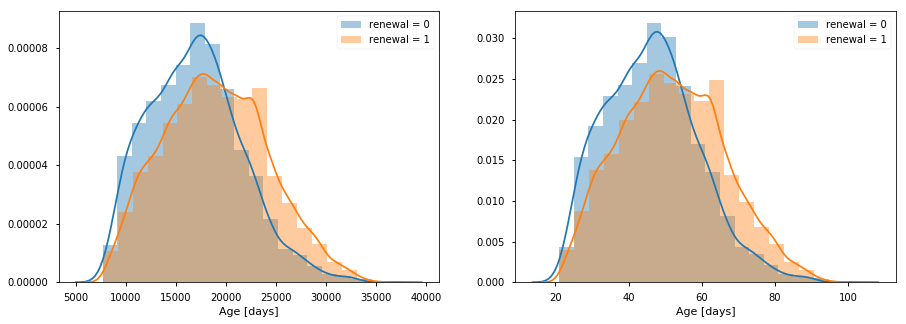

In [32]:
plt.close()

fig, ax = plt.subplots(figsize=(15,5),
                       nrows=1,
                       ncols=2
                      )

# ----------------------------
# Distribution of Age in days
# ----------------------------
x1 = data[data['renewal'] == 1]['age_in_days']
x0 = data[data['renewal'] == 0]['age_in_days']

for x, label in zip([x0, x1], [0, 2]):
    sns.distplot(x, 
                 ax=ax[0],
                 kde=True,
                 hist=True,
                 bins=20,
                 axlabel='Age [days]',
                 color=tab20[label],
                 label='renewal = %d' % (label/2)
                )
ax[0].legend()

# ----------------------------
# Distribution of Age in years
# ----------------------------
Xplot = pd.DataFrame()
Xplot['age_in_days'] = data['age_in_days'].apply(lambda row: np.floor(row/365.))
Xplot['renewal'] = data['renewal']

x1 = Xplot[Xplot['renewal'] == 1]['age_in_days']
x0 = Xplot[Xplot['renewal'] == 0]['age_in_days']

for x, label in zip([x0, x1], [0, 2]):
    sns.distplot(x, 
                 ax=ax[1],
                 kde=True,
                 hist=True,
                 bins=20,
                 axlabel='Age [days]',
                 color=tab20[label],
                 label='renewal = %d' % (label/2)
                )
ax[1].legend()


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


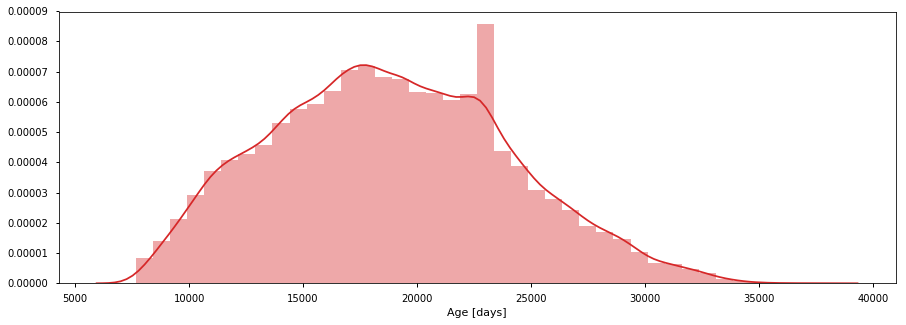

In [37]:
plt.close()

fig, ax = plt.subplots(figsize=(15,5),
                       nrows=1,
                       ncols=1
                      )

# ----------------------------
# Distribution of Age in days
# ----------------------------
sns.distplot(data['age_in_days'], 
             ax=ax,
             kde=True,
             hist=True,
             bins=40,
             axlabel='Age [days]',
             color=tab20[6]
            )

In [43]:
temp=data['age_in_days'].apply(lambda row: np.floor(row/365.))
print(temp[temp>100.])

5045     102.0
19085    102.0
26029    101.0
38401    101.0
38441    103.0
Name: age_in_days, dtype: float64


# 2. Premiums late

In [44]:
total_late = pd.DataFrame()
total_late['total'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] +\
                      data['Count_more_than_12_months_late']
total_late['renewal'] = data['renewal']

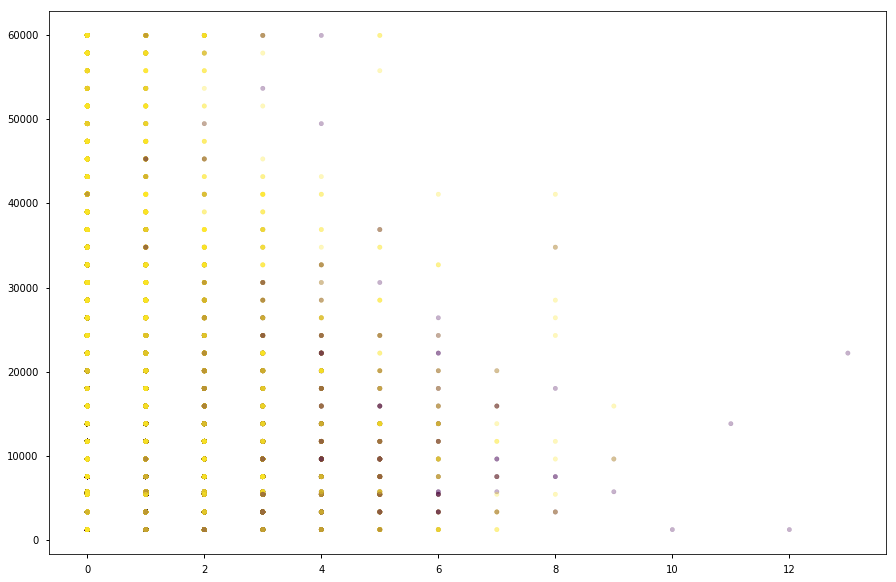

In [61]:
plt.close()

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(data['Count_3-6_months_late'], 
           data['premium'], 
           c=data['renewal'],
           s=20.,
           alpha=0.3
          )

# Sourcing channel

In [76]:
sourcing_channel=data[['sourcing_channel','renewal']] \
    .groupby('sourcing_channel')['renewal'] \
    .agg(['count','mean','std'])

In [80]:
sourcing_channel.index.tolist()

['A', 'B', 'C', 'D', 'E']

(0.0, 1.0)

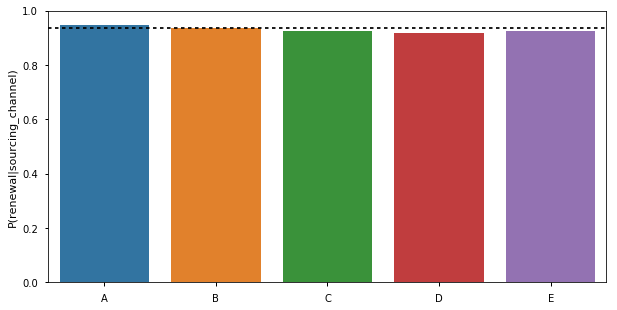

In [98]:
plt.close()

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x=sourcing_channel.index.tolist(),
            y=sourcing_channel['mean'],
            ax=ax
           )
ax.plot([-1,6], [data['renewal'].mean()]*2, c='k', dashes=[2,2])
ax.set_ylabel('P(renewal|sourcing_channel)')
ax.set_ylim(0.,1.)

# Residence Area Type

In [86]:
residence=data[['residence_area_type','renewal']] \
    .groupby('residence_area_type')['renewal'] \
    .agg(['count','mean','std'])

In [87]:
residence

,count,mean,std
residence_area_type,,,
Rural,31670,0.936912,0.243125
Urban,48183,0.937737,0.241634


(0.0, 1.0)

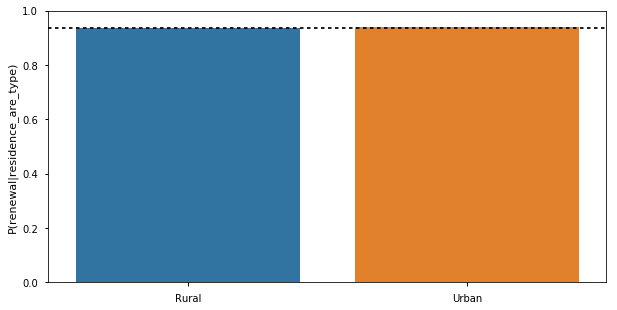

In [99]:
plt.close()

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x=residence.index.tolist(),
            y=residence['mean'],
            ax=ax
           )
ax.plot([-1,3], [data['renewal'].mean()]*2, c='k', dashes=[2,2])
ax.set_ylabel('P(renewal|residence_are_type)')
ax.set_ylim(0.,1.)

# Correlation matrix

In [93]:
data_new = data[['perc_premium_paid_by_cash_credit', 
                 'age_in_days', 
                 'Income', 
                 'Count_3-6_months_late', 
                 'Count_6-12_months_late', 
                 'Count_more_than_12_months_late', 
                 'application_underwriting_score', 
                 'no_of_premiums_paid', 
                 'premium', 
                 'renewal']]
data_new['total'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] +\
                    data['Count_more_than_12_months_late']

/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


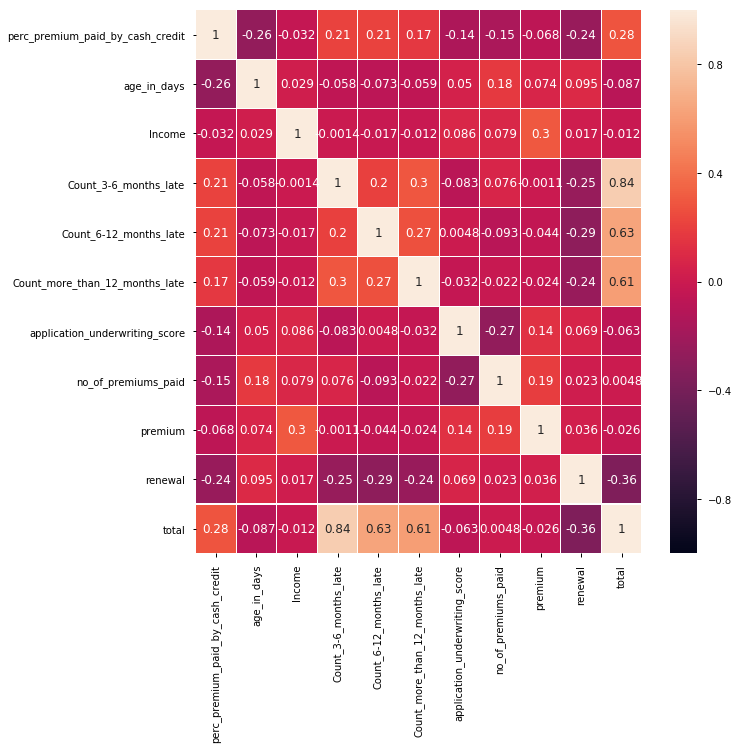

In [94]:
plt.close()

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data_new.corr(),
            vmin=-1.,
            vmax=1.,
            annot=True,
            linewidths=.05,
            ax=ax
           )

# Does Underwriting Score matter?

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


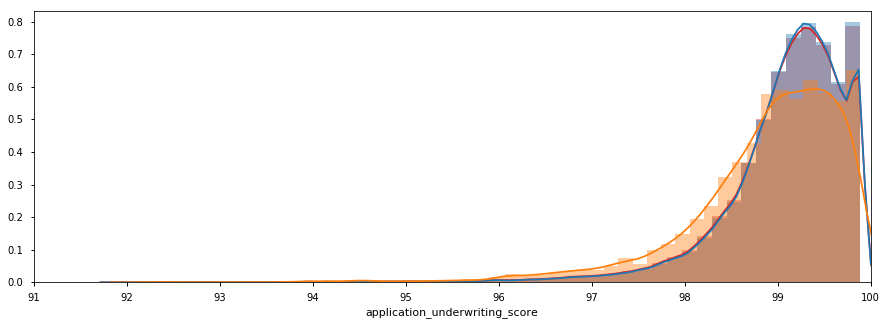

In [121]:
plt.close()

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlim(91,100)

sns.distplot(data['application_underwriting_score'].dropna(), 
             ax=ax,
             color=tab20[6]
            )

sns.distplot(data[data['renewal']==1]['application_underwriting_score'].dropna(), 
             ax=ax,
             hist=True,
             kde=True,
             color=tab20[0]
            )

sns.distplot(data[data['renewal']==0]['application_underwriting_score'].dropna(), 
             ax=ax,
             color=tab20[2]
            )

In [125]:
data[['id','renewal']].groupby('renewal').count()

,id
renewal,
0,4998
1,74855


Because there is significantly less values corresponding to `renewal=0` I do not want to judge right now if `underwriting_score` has any influence on `renewal`.

# Premiums

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


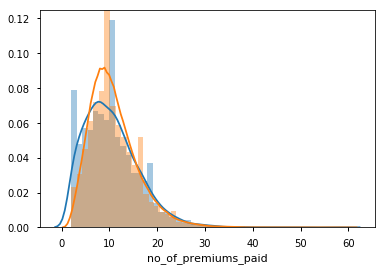

In [128]:
plt.close()

fig, ax = plt.subplots()

sns.distplot(data[data['renewal']==0]['no_of_premiums_paid'],
             ax=ax
            )

sns.distplot(data[data['renewal']==1]['no_of_premiums_paid'],
             ax=ax
            )

/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


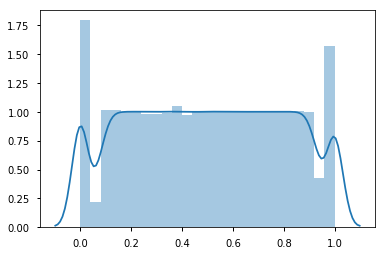

In [76]:
# transform distribution
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing.data import QuantileTransformer

scale = QuantileTransformer()

x= data['perc_premium_paid_by_cash_credit']
x = x.reshape(-1,1)
x = scale.fit_transform(x)

sns.distplot(x, bins=25)
#sns.distplot(data[data['renewal']==1]['perc_premium_paid_by_cash_credit'])
#sns.distplot(data[data['renewal']==0]['perc_premium_paid_by_cash_credit'])

# Prepare features

In [7]:
data = pd.read_csv('./data/train.csv')

X = data[[
#          'perc_premium_paid_by_cash_credit', 
#          'age_in_days', 
#          'Income', 
          'Count_3-6_months_late', 
          'Count_6-12_months_late', 
          'Count_more_than_12_months_late', 
          'no_of_premiums_paid', 
#          'premium',
          'application_underwriting_score',
#          'sourcing_channel'
         ]]
X['logIncome'] = np.log(data['Income'])
X['logAge'] = np.log(data['age_in_days'])
X['logperc_premium_paid_by_cash_credit'] = np.log(1. + data['perc_premium_paid_by_cash_credit'])
#X['Count_3-6_months_late'] = X['Count_3-6_months_late'].apply(lambda x: 0. if x<2 else 1.)
#X['Count_6-12_months_late'] = X['Count_6-12_months_late'].apply(lambda x: 0. if x<1 else 1.)
#X['Count_more_than_12_months_late'] = X['Count_more_than_12_months_late'].apply(lambda x: 0. if x<1 else 1.)
#X['sourcing_channel'] = X['sourcing_channel'].replace({'A':1.,
#                               'B':2.,
#                               'C':3.,
#                               'D':4.,
#                               'E':5
#                               }
#                              )
# fill nans
#for name in X.columns.tolist():
#    val = X[name].mean()#.iloc[0]
#    X[name].fillna(val, inplace=True)
    
# standard scaler
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X = X.fit_stransform()
#X['perc_premium_paid_by_cash_credit'] = scale.transform(X['perc_premium_paid_by_cash_credit'].reshape(-1,1))
#data['new'] = data['perc_premium_paid_by_cash_credit'] * data['premium']
#X['standard_age'] = data['age_in_days'].apply(lambda row: np.floor(row/365.))
#X['freq'] = data['premium']/data['Income']
#X = X.drop('age_in_days', axis=1)
#X['total'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] +\
#             data['Count_more_than_12_months_late']
y = data['renewal']

/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

## 1. XGBoost
[xgboost tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, log_loss

# max_depth = 5
# min_child_weight = 5
# colsample_bytree
# subsample
# gamma
# 

estimator = XGBClassifier(n_estimators=250,
                          reg_alpha=10.,
                          reg_lambda=0.,
#                          gamma=0.,
#                          max_depth=3,
#                          min_child_weight=1,
#                          colsample_bytree=0.6
                         )

skf = StratifiedKFold(n_splits=10)

auc_tab = []
loss_tab = []

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    estimator.fit(X_train, y_train)
    prob = estimator.predict_proba(X_test)
    
    auc = roc_auc_score(y_test, prob[:,1])
    loss = log_loss(y_test, prob)
    
    auc_tab.append(auc)
    loss_tab.append(loss)

In [9]:
auc_tab = np.array([auc_tab])
loss_tab = np.array([loss_tab])
print('AUC: %.5f +/- %.5f' % (np.mean(auc_tab), np.std(auc_tab)))
print('Loss: %.5f +/- %.5f' % (np.mean(loss_tab), np.std(loss_tab)))
print('--------------------------------------')
print(estimator.feature_importances_)

AUC: 0.84357 +/- 0.00798
Loss: 0.17876 +/- 0.00333
--------------------------------------
[0.08770917 0.08251587 0.0559723  0.09809579 0.18869013 0.17484131
 0.17772649 0.13444893]


## 2. Random Forest

In [102]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, log_loss

# criterion = 'gini', 'entropy'
# max_dept
# min_samples_split=2
# min_samples_leaf=1

estimator = RandomForestClassifier(n_estimators=50,
                                   criterion='entropy',
                                   min_samples_split=4
                                  )

skf = StratifiedKFold(n_splits=10)

auc_tab = []
loss_tab = []

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    estimator.fit(X_train, y_train)
    prob = estimator.predict_proba(X_test)
    
    auc = roc_auc_score(y_test, prob[:,1])
    loss = log_loss(y_test, prob)
    
    auc_tab.append(auc)
    loss_tab.append(loss)
    print('Jolo')

Jolo
Jolo
Jolo
Jolo
Jolo
Jolo
Jolo
Jolo
Jolo
Jolo


In [103]:
auc_tab = np.array([auc_tab])
loss_tab = np.array([loss_tab])
print('AUC: %.5f +/- %.5f' % (np.mean(auc_tab), np.std(auc_tab)))
print('Loss: %.5f +/- %.5f' % (np.mean(loss_tab), np.std(loss_tab)))
print('--------------------------------------')
print(estimator.feature_importances_)

AUC: 0.80959 +/- 0.01223
Loss: 0.30933 +/- 0.01870
--------------------------------------
[0.19098464 0.15832054 0.16118622 0.06104003 0.08913097 0.04141064
 0.08596206 0.06982542 0.14213948]


In [172]:
data_test = pd.read_csv('./data/test.csv')

X_test = data_test[['perc_premium_paid_by_cash_credit', 
          'age_in_days', 
          'Income', 
          'Count_3-6_months_late', 
          'Count_6-12_months_late', 
          'Count_more_than_12_months_late', 
          'no_of_premiums_paid', 
          'premium']]

estimator.fit(X,y)
print('fiting done!')
prob=estimator.predict_proba(X_test)[:,1]
print('Probability generated!')
premium = X_test['premium'].tolist()
opt = optimal_incentives(prob,premium)

In [ ]:
sns.barplot()

In [174]:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['renewal'] = prob
submission['incentives'] = opt

submission.to_csv('./data/submission.csv', index=False)

<BarContainer object of 8 artists>

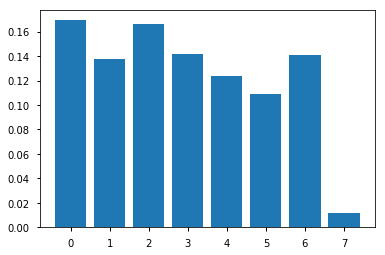

In [176]:
# plot
plt.bar(range(len(estimator.feature_importances_)), estimator.feature_importances_)

In [166]:
def probability_change(p, x):
    from numpy import exp
    
    res = p*(1. + 0.01*20.*( 1. - exp(-2.)*exp( 2.*exp(-x/400.) ) ) )
    return res if res<=1.0 else 1.0

def optimal_incentives(prob, premium):
    from scipy.optimize import minimize
    
    opt = []
    for p, amount in zip(prob, premium):
        # formula given by McKinsey
        revenue = lambda x: -( amount*probability_change(p, x) - x )
        
        res=minimize(revenue, x0=[0.], bounds=[(0., 1.0E+05)])
        
        opt.append(res.x[0])
        
    return opt

In [142]:
rfc.fit(X,y)

rfc.predict_proba(X)

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5]])

In [167]:
prob = rfc.predict_proba(X)[:,0]
premium = X['premium'].tolist()

In [168]:
optimal_incentives(prob[:5],premium[:5])

[0.0, 0.0, 0.0, 0.0, 0.0]

# Tunning XGBoost

In [184]:
X = data[['perc_premium_paid_by_cash_credit', 
          'age_in_days', 
          'Income', 
          'Count_3-6_months_late', 
          'Count_6-12_months_late', 
          'Count_more_than_12_months_late', 
          'no_of_premiums_paid', 
          'premium']]
y = data['renewal']

In [185]:
from sklearn.cross_validation import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1543)

In [189]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from xgboost import XGBClassifier

estimator = XGBClassifier(n_estimators=150)
print(estimator.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 150, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1}


In [190]:
# Optimal tree size
estimator.fit(X_train, y_train, 
              eval_metric=['auc','logloss'], 
              eval_set=[(X_train, y_train),(X_test, y_test)],
              early_stopping_rounds=None,
              verbose=False
             )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

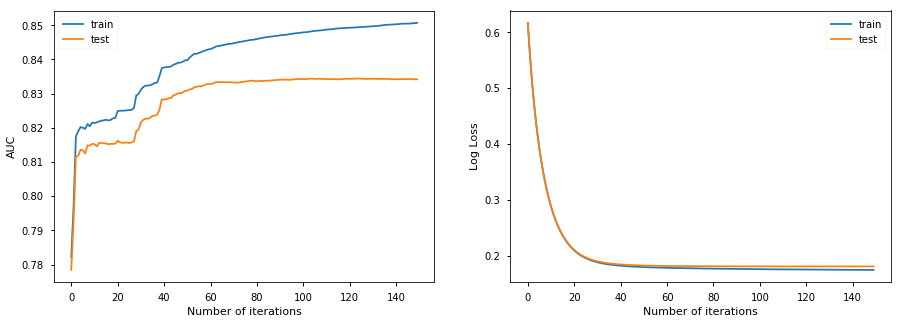

In [191]:
results = estimator.evals_result()

import matplotlib.pyplot as plt
plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2, gridspec_kw={'wspace':0.2})

ax[0].plot(results['validation_0']['auc'], label='train')
ax[0].plot(results['validation_1']['auc'], label='test')
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('AUC')
ax[0].legend()

ax[1].plot(results['validation_0']['logloss'], label='train')
ax[1].plot(results['validation_1']['logloss'], label='test')
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Log Loss')
ax[1].legend()